In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Divida os dados em conjuntos de treino (70%) e teste (30%) utilizando a função train_test_split
Padronize os dados para melhorar o desempenho do modelo utilizando StandardScaler

In [13]:

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho do conjunto de treino: {X_train_scaled.shape}, Tamanho do conjunto de teste: {X_test_scaled.shape}")

Tamanho do conjunto de treino: (398, 30), Tamanho do conjunto de teste: (171, 30)


Utilize o SVM com o kernel linear para treinar o modelo com os dados padronizados

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[ 61   2]
 [  2 106]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Após o treinamento, faça as previsões para os dados de teste
Avalie o desempenho do modelo utilizando as métricas de precisão, recall, F1-score e a matriz de confusão

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(class_report)

Matriz de Confusão:
[[ 61   2]
 [  2 106]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Altere o kernel do modelo para explorar outras abordagens (ex.: rbf, poly) e compare os resultados com o modelo linear
Altere os valores de c e gamma para os mesmos utilizados em testes anteriores

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

C = 1.0
gamma = 'scale'

svm_model_rbf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
svm_model_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test_scaled)

print("Resultados do Modelo SVM com Kernel RBF:")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rbf))

degree = 3
svm_model_poly = SVC(kernel='poly', C=C, degree=degree, random_state=42)
svm_model_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_model_poly.predict(X_test_scaled)

print("\nResultados do Modelo SVM com Kernel Polinomial:")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_poly))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_poly))

print("\nResultados do Modelo SVM com Kernel Linear:")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Resultados do Modelo SVM com Kernel RBF:
Matriz de Confusão:
[[ 61   2]
 [  2 106]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Resultados do Modelo SVM com Kernel Polinomial:
Matriz de Confusão:
[[ 45  18]
 [  0 108]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        63
           1       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


Resultados do Modelo SVM com Kernel Linear:
Matriz de Confusão:
[[ 61   2]
 [  2 106]]

Relatório de Classifica

In [17]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

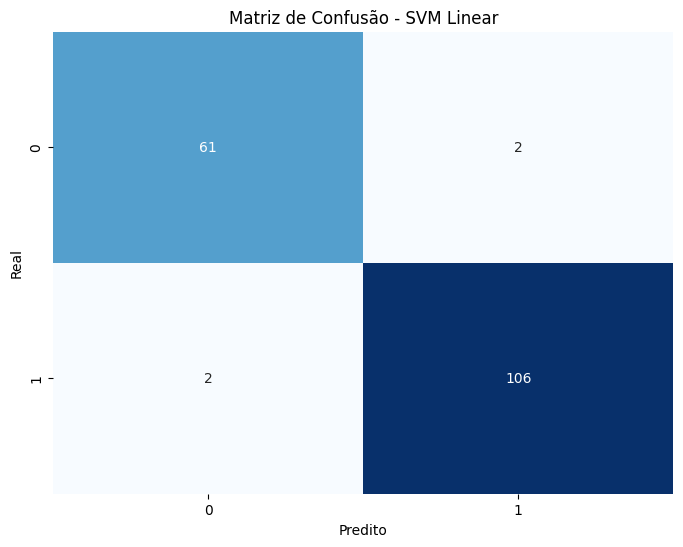

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [18]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

1- Qual foi o desempenho do modelo SVM com o kernel linear? Compare as métricas de acurácia, precisão, recall e F1-score.
2- Como o desempenho do modelo mudou ao utilizar um kernel não-linear (por exemplo, rbf ou poly)? Quais melhorias ou desafios surgiram?
3- A padronização dos dados influenciou de alguma forma o desempenho do modelo? O que aconteceria se os dados não fossem padronizados?
4- Quais outras estratégias de ajuste de hiperparâmetros ou pré-processamento poderiam ser aplicadas para melhorar o desempenho do SVM?


1- Desempenho do modelo SVM Com kernel linear representa um desempenho solido onde as metricas de precisão, recall e f1 podem variar, entao esse modelo pode ser tanto inferior ou superior em comparação com kernels
2- quando utiliza o kernel nao linear o desempenho pode melhorar, principalmente se os dados nao forem separaveis. comparar os resultados permite identificar qual kernel é mais adequado para o conjuntode dados.
3- com os dados nao padronizados, escalas maiores podem fazer com que a função de decisao tenha um baixo desempenho
4- podem ser usado a eliminação de caracteristicas irrelevantes, tratamento de dados ausentes e feature engineering